## Imports

In [1]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import jax.numpy as jnp

## 1. Simulate the dynamics of cat qubits at the effective Hamiltonian level.

In Tutorial 1, we have introduced that we can dissipatively stabilize a cat qubit by coupling a memory mode  that will store our cat qubit to a lossy buffer mode with a specific interaction that exchanges two photons of the memory mode with one photon in the buffer mode.

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}]$$

The Hamiltonian of the system is given by
$$
\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}
$$

Here, $\hat{H}_{\mathrm{2ph}}$ is the two-photon exchange Hamiltonian and $\hat{H}_d$ is the buffer drive Hamiltonian.

### Task 1.1
**Task 1.1: Getting started with `dynamiqs`**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters:

$$
\begin{aligned}
g_2 = 1.0, 
\epsilon_d = -4, 
\kappa_b = 10
\end{aligned}
$$

(For now, we pretend that the parameters are without dimensions)

Use an initial state $\lvert \psi_0 \rangle$ in which both the buffer and the memory are in the vacuum. Use a Hilbert-space truncation of $n_a = 20$ and $n_b = 5$ (number of Fock-states in mode a and mode b, respectively) to begin with. You can play with a different Hilbert-space truncation.

Simulate the dynamics for a time $T=4$. 

Plot the wigner function of mode a (as a GIF or as a mosaic plot).

Also plot the expectation value of the number of photons, as well as the photon number parity in the memory mode.

In [2]:
# Define parameters
g2 = 1.0
epsilon_d = -4
kappa_b = 10
T = 4.0  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the 2ph Hamiltonian
H_2PH = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b)

# Define the Driving Hamiltonian
H_D = epsilon_d * (b + b.dag())

# Define Hamiltonian (using g2 and epsilon_d)
H = H_2PH + H_D

# Define dissipation (buffer decay)
jump_ops = [jnp.sqrt(kappa_b) * b]

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, jump_ops, psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states,0)  # Keep only mode a


|          |   0.2% ◆ elapsed 8.22ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     
100%|██████████| 48/48 [00:40<00:00,  1.18it/s]


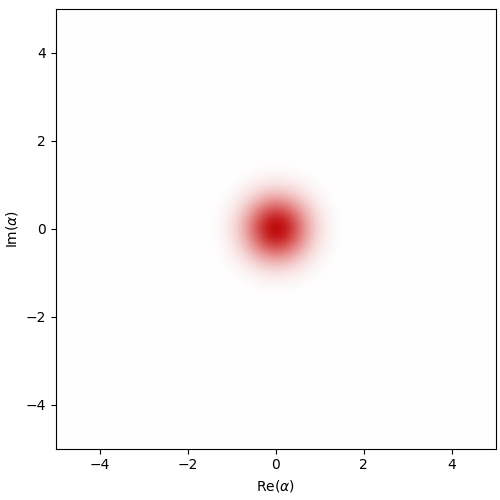

In [3]:
# Plot Wigner function of mode a
dq.plot.wigner_gif(rho_a, gif_duration = 2, fps=24)

In [4]:
# Compute Expectation Values for Mode a
exp_photon_a = dq.expect(dq.number(na), rho_a)  # Photon number expectation
exp_parity_a = dq.expect(dq.parity(na), rho_a)  # Photon number parity

In [5]:
exp_parity_a # Acquired using the dynamiqs parity API. Unsure as to why it does not start from 0 (and immediately jump to 1)

Array([1.        +0.j, 0.99999994+0.j, 1.0000001 +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.9999999 +0.j, 1.        +0.j, 0.9999999 +0.j,
       0.9999999 +0.j, 0.99999994+0.j, 0.99999994+0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 0.9999998 +0.j,
       0.99999994+0.j, 0.99999994+0.j, 0.99999994+0.j, 1.        +0.j,
       0.99999994+0.j, 0.9999999 +0.j, 0.9999998 +0.j, 1.        +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 0.99999994+0.j,
       0.99999994+0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.0000001 +0.j, 1.        +0.j, 1.0000001 +0.j, 1.0000002 +0.j,
       1.        +0.j, 1.        +0.j, 1.0000001 +0.j, 0.99999994+0.j,
      

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


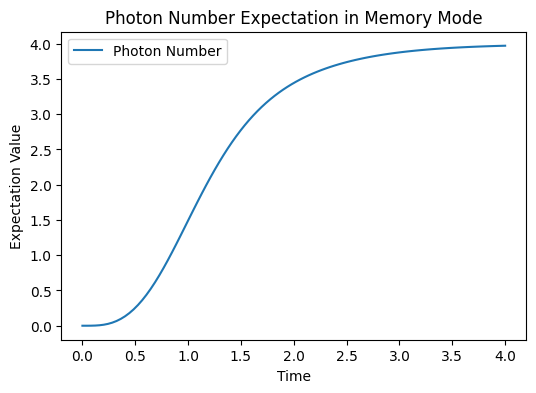

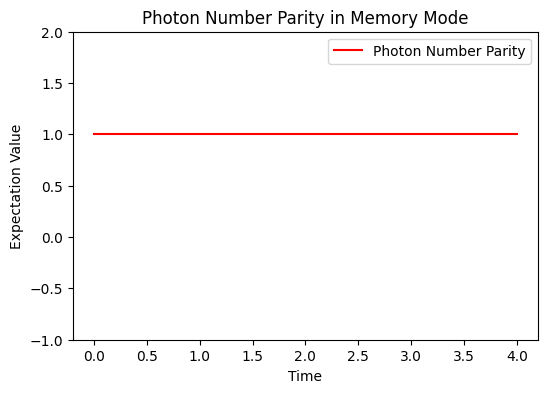

In [6]:
# Plot Photon Number Expectation
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_photon_a, label="Photon Number")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Expectation in Memory Mode")
plt.show()

# Plot Photon Number Parity
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_parity_a, label="Photon Number Parity", color="red")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Parity in Memory Mode")

# Set y-axis limits (optional, adjust as needed)
plt.ylim([- 1, 2])

plt.show()

## Task 1.2
**Task 1.2: Comparison with eliminated buffer mode**

Compare your result from Task 1.1 to the system where the buffer mode is adiabatically eliminated, in which the dynamics of the memory mode is given by:
```math
\frac{d \hat{\rho}_a}{d t} = \kappa_2 \mathcal{D}[\hat{a}^2 - \alpha^2](\hat{\rho}_a),
```
with two-photon dissipation rate $\kappa_2 = 4|g_2|^2 / \kappa_b$ and cat amplitude $\alpha^2 = -\epsilon_d/g_2^*$.

Compute the time-evolution of the fidelity between the time-evolved states computed with the two-mode system from Task 1.1. What do you observe if you lower $\kappa_b$?

In [7]:
# Define kappa_2
kappa_2 = 4 * (jnp.abs(g2)**2) / kappa_b 

# Define single-mode annihilation operator
a_single = dq.destroy(na)

# Define effective Hamiltonian (set to zero for pure dissipation case)
H_eff = dq.zeros(na)

# Define the cat amplitude
alpha_squared = -(epsilon_d / g2)

# Define the two-photon loss operator
L2 = jnp.sqrt(kappa_2) * (a_single @ a_single - alpha_squared * dq.eye(na))

# Find the result using mesolve
res_eff = dq.mesolve(H_eff, [L2], dq.fock(na, 0), tsave)

|          |   0.2% ◆ elapsed 7.14ms ◆ remaining 0.00ms

In [9]:
# Calculate the fidelity of the full and effective system
F = dq.fidelity(rho_a[-1], res_eff.states[-1])
print(f"Fidelity between full and effective system: {F:.4f}")

Fidelity between full and effective system: 1.0001


We see, here, that a *Fidelity* of F $\approx 1$ indicates that the two-mode system can be well approximated by the single-mode system.

Full Two-Mode System


  0%|          | 0/48 [00:00<?, ?it/s]

100%|██████████| 48/48 [00:09<00:00,  5.25it/s]


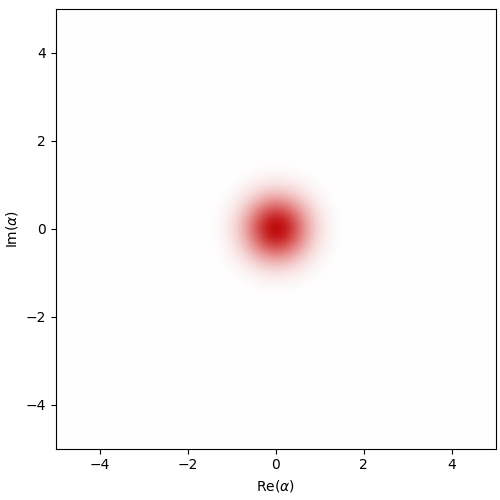

In [10]:
print("Full Two-Mode System")
dq.plot.wigner_gif(rho_a, gif_duration = 2, fps=24)

Effective Single-Mode System


100%|██████████| 48/48 [00:07<00:00,  6.28it/s]


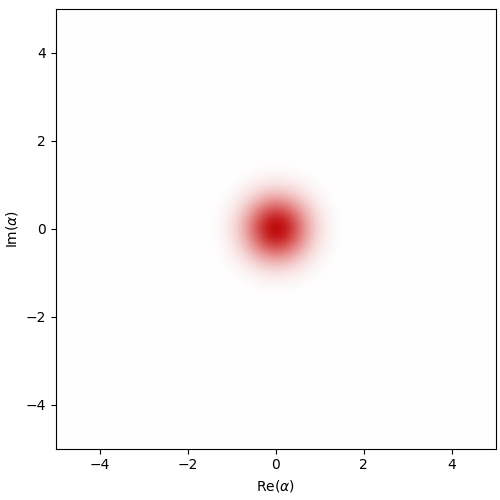

In [11]:
print("Effective Single-Mode System")
dq.plot.wigner_gif(res_eff.states, gif_duration = 2, fps=24)

[10.          2.65914795  0.70710678  0.18803015  0.05      ]


|██████████| 100.0% ◆ elapsed 707.20ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 51.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 454.99ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 294.00ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 407.76ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 808.57ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 478.44ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.19s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 532.67ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 7.14s ◆ remaining 0.00ms  


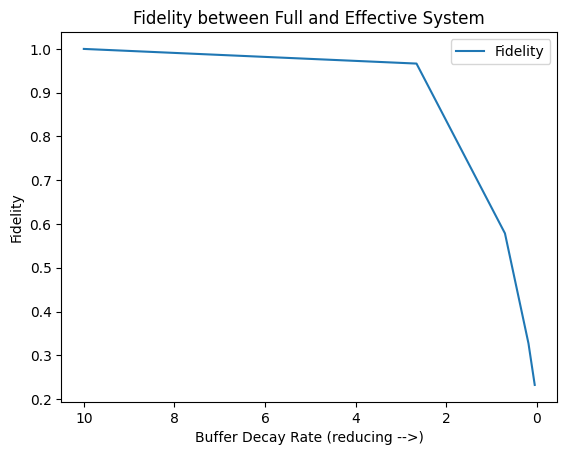

In [12]:
# Looking at lower kappa_b values. We will reuse the previous code, wrapping it in a function parameterized 
# by kappa_b. Note that na and other variables are global and will be used in the function.

def simulate_fidelity_over_lower_kappa_b(kappa_b):

    # Define annihilation operators correctly for both modes
    a, b = dq.destroy(na, nb)

    # Define initial state: vacuum state for both modes
    psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

    # Define the 2ph Hamiltonian
    H_2PH = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b)

    # Define the Driving Hamiltonian
    H_D = epsilon_d * (b + b.dag())

    # Define Hamiltonian (using g2 and epsilon_d)
    H = H_2PH + H_D

    # Define dissipation (buffer decay)
    jump_ops = [jnp.sqrt(kappa_b) * b]

    # Define time evolution
    tsave = jnp.linspace(0, T, 100)

    # Solve the master equation
    res = dq.mesolve(H, jump_ops, psi0, tsave)

    # Extract the memory mode (mode_a) by partial tracing
    rho_a = dq.ptrace(res.states,0)  # Keep only mode a

    # Define kappa_2
    kappa_2 = 4 * (jnp.abs(g2)**2) / kappa_b 

    # Define single-mode annihilation operator
    a_single = dq.destroy(na)

    # Define effective Hamiltonian (set to zero for pure dissipation case)
    H_eff = dq.zeros(na)

    # Define the cat amplitude
    alpha_squared = -(epsilon_d / g2)

    # Define the two-photon loss operator
    L2 = jnp.sqrt(kappa_2) * (a_single @ a_single - alpha_squared * dq.eye(na))

    # Find the result using mesolve
    res_eff = dq.mesolve(H_eff, [L2], dq.fock(na, 0), tsave)

    # Calculate the fidelity of the full and effective system
    F = dq.fidelity(rho_a[-1], res_eff.states[-1])
    # print(f"Fidelity between full and effective system: {F:.4f}")

    return F

# Define the start and end values
start_value = 10
end_value = 0.05
num_terms = 5

# Create an array with exponentially decreasing values
kappa_b = np.logspace(np.log10(start_value), np.log10(end_value), num=num_terms)

print(kappa_b)

fidelities = []
for kappa in kappa_b:
    fidelities.append(simulate_fidelity_over_lower_kappa_b(kappa))

plt.plot(kappa_b, fidelities, label="Fidelity")
plt.xlabel("Buffer Decay Rate (reducing -->)")
plt.ylabel("Fidelity")
plt.legend()
plt.title("Fidelity between Full and Effective System")
plt.gca().invert_xaxis()
plt.show()

### Task 1.3
**Task 1.3: Performing a Zeno-gate**

To fully control a cat qubit, we also need to be able to perform gates.

**$Z(\theta)$-rotation**: In addition to the dissipative stabilization mechanism simulated in Task 1.1, find a Hamiltonian that performs a contiuous rotation around the $Z$-axis of the qubit, also called Zeno gate, (as a reminder: the cat states $\lvert \mathcal{C}_\alpha^ \pm \rangle$ define the logical $X$-eigenstates $\lvert\pm\rangle$). This additional Hamiltonian has the form: $\hat{H}_Z = \epsilon_Z^* \hat{O} + \epsilon_Z \hat{O}^\dagger$, where $\hat{O}$ is a bosonic operator.

**a)** Simulate the time-evolution that maps $\lvert+\rangle$ to $\lvert-\rangle$ in a time $T_Z$, where $2T_Z$ is the time it takes to make a full rotation.
The speed of rotation will depend on the strenght of the parameter $\epsilon_Z$ in the Hamiltonian $H_Z$ that generates the rotation.

**b)** Optimize parameters: In a real-world scenario, also our memory mode is subject to losses of single photons. Let $\kappa_a$ be the single-photon loss rate of mode a.

For various values of $\kappa_a$ from the interval $\kappa_a \in [0.01, 2]$ and for various values of $\epsilon_Z$, plot the parity as a function of time in the presence of $\hat{H}_Z$.

For the parameter range of $\kappa_a$ above, find the optimal times $T_Z$ for a rotation of $\theta = 0 \rightarrow \pi.$

|██████████| 100.0% ◆ elapsed 95.12ms ◆ remaining 0.00ms


Effective Single-Mode System


100%|██████████| 96/96 [00:07<00:00, 13.60it/s]


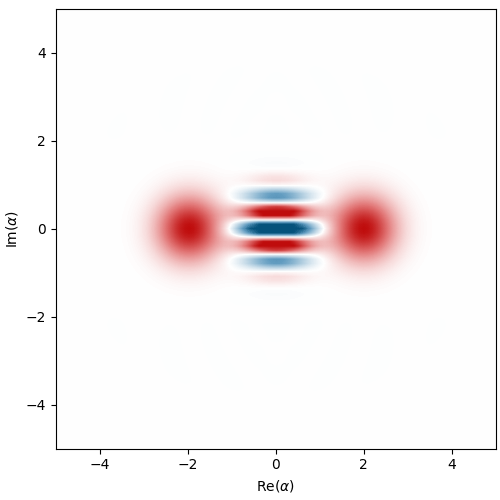

In [13]:
# Define kappa_2
kappa_a = 1 
ez = 0.2
na=20

# Define single-mode annihilation operator
a = dq.destroy(na)
adag = a.dag()

alpha_squared = -(epsilon_d / g2)
alpha = jnp.sqrt(alpha_squared) 


# Define effective Hamiltonian (set to zero for pure dissipation case)
H_z = ez*adag + ez*a


# Define the two-photon loss operator
L3 = jnp.sqrt(kappa_a) * (a @ a - alpha_squared * dq.eye(na))

psi0 = dq.coherent(na,alpha) - dq.coherent(na,-alpha) 

# Find the result using mesolve
res_eff = dq.mesolve(H_z,[L3], psi0, tsave)
print("Effective Single-Mode System")
dq.plot.wigner_gif(res_eff.states, gif_duration = 4, fps=24)

## 2. Simulate the dynamics of cat qubits at the circuit level.

When simulating a quantum system at the circuit level, the system becomes a bit more complex.
In Tutorial 2, we have seen that ATS with a flux pump can be used to engineer the two-photon interaction, let's simulate this in practice:

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}] +  \kappa_a \mathcal{D}(\hat{a})[\hat{\rho}]$$

At the saddle point ($\varphi_\Sigma = \pi/2 + \epsilon(t)$, $\varphi_\Delta = \pi/2$) the Hamiltonian of the system in the lab frame is given by
```math
\begin{aligned}
\hat{H} &= \hat{H}_0 + \hat{H}_{\mathrm{ATS}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_0 &= \omega_{a,0}\hat{a}^\dagger \hat{a} + \omega_{b,0} \hat{b}^\dagger \hat{b}\\ 
\hat{H}_{ATS} &= -2 E_J \sin(\epsilon(t)) \sin(\hat{\varphi}) +2 \Delta E_J \cos(\epsilon(t)) \cos(\hat{\varphi}),\\
\hat{H}_d &= 2 \epsilon_d \cos(\omega_d t) \left(\hat{b} +  \hat{b}^\dagger\right).
\end{aligned}
```

Here, $\epsilon(t) = \epsilon_p \cos(\omega_p t)$.

### Task 2.1

**Task 2.1: Lab frame simulation**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters (taken [from this paper](https://arxiv.org/abs/2307.06617)):
$$
\begin{aligned}
\omega_{a,0}/2\pi &= 5.26\; \mathrm{GHz}\\
\omega_{b,0}/2\pi &= 7.70\; \mathrm{GHz}\\
\varphi_a &= 0.06\\
\varphi_b &= 0.29\\
E_J/h &= 42.76\; \mathrm{GHz}\\
\Delta E_J / h &= 0.47\;\mathrm{GHz}\\
\omega_d/2\pi &= 7.623 \; \mathrm{GHz}\\
\omega_p/2\pi &= 2.891 \; \mathrm{GHz}\\
\epsilon_d/2\pi &= -3.815 \; \mathrm{MHz}\\
\epsilon_p &= 0.122 \; \mathrm{rad}
\end{aligned}
$$

Starting from the vacuum in both modes, simulate the dynamics of this system for a time $T = X \; \mu \mathrm{s}$.
Plot the evolution of the wigner function in mode a.

In [14]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [15]:
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

In [ ]:
# Define physical constants

omega_a_0 = 5.26 * GHz # bare resonant frequency of mode a
omega_b_0 = 7.7 * GHz # bare resonant frequency of mode b

phi_a = 0.06 # zero-point fluctuation phase of mode a
phi_b = 0.29 # zero-point fluctuation phase of mode a
e_J = 12.03 * GHz # Josephson energy
delta_e_J = 0.47 * GHz

kappa_a = 9.3 * kHz # relaxation rate of mode a
kappa_b = 2.6 * MHz # relaxation rate of mode b

g2_target = 0.763*MHz # target g2 used to specify driving strength of ATS
alpha_target = np.sqrt(5.0) # target alpha, (or equivalently specify number of photons)

#driving strengths:
epsilon_p = 2*g2_target/(e_J * phi_a**2 * phi_b) # flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target) # buffer pump power


omega_d = 7.623 * GHz
omega_p = 2.891 * GHz
eps_d = -3.815 * MHz
eps_p = 0.122 / (2 * jnp.pi)

T = 100  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)
adag=a.dag()
bdag=b.dag()

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the Hamiltonian0
H0 = omega_a_0 * (adag@a) + omega_b_0 * (bdag@b)

# Define the Hamiltonian ATS
ats_a = (phi_a * (a+adag))
ats_b = (phi_b * (b+bdag))

def e_t(t):
    return eps_p * jnp.cos(omega_p*t)
    
#H_ats = dq.timecallable(lambda t: 
                          #  +(2*delEj*(1-(0.5*e_t(t)**2)) * (dq.tensor(dq.eye(na),dq.eye(nb)) - (1/2)*((ats_a+ats_b)@(ats_a+ats_b)) )) )
H_ats_sin = dq.modulated(lambda t: e_J * e_t(t), (-2 * ats_a + -2 * ats_b + (1 / 3) * (ats_a + ats_b) @ (ats_a + ats_b) @ (ats_a + ats_b)))
H_ats_cos = dq.modulated(lambda t: 2 * delta_e_J * (1 - (0.5 * e_t(t)**2)), (dq.tensor(dq.eye(na), dq.eye(nb)) - (1 / 2) * ((ats_a + ats_b) @ (ats_a + ats_b))))
H_ats = H_ats_sin + H_ats_cos

# Define drive Hamiltonian
H_d = dq.modulated(lambda t: (2 * eps_d * jnp.cos(omega_p * t)), (b + bdag))

# Define total Hamiltonian
H = H0 + H_ats + H_d

# Define dissipation (buffer decay)
alpha_squared = -eps_d / g2_target  # Cat state amplitude

# Define dissipation (buffer decay)
L3 = jnp.sqrt(kappa_a) * (a @ a - alpha_squared * dq.tensor(dq.eye(na), dq.eye(nb)))

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, [L3], psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states, 0)  # Keep only mode a


### Task 2.3
**Task 2.2: Rotated-displaced frame simulation**

To compare with the system at the effective Hamiltonian level, we have to transform our circuit level system into a rotated-displaced frame.
Find the correct rotated-displaced frame for the system.

Then, simulate the time-evolution of this system with the previous parameters.

Plot again the evolution of the wigner funciton in mode a. What is different in this frame?

## Task 2.4 (Experimenting with crazy parameters)

In [49]:
# Define physical constants

omega_a_0 = 5.26 * GHz # bare resonant frequency of mode a
omega_b_0 = 7.7 * GHz # bare resonant frequency of mode b

phi_a = 0.06 # zero-point fluctuation phase of mode a
phi_b = 0.29 # zero-point fluctuation phase of mode a
e_J = 1000.03 * GHz # Josephson energy
delta_e_J = 0.47 * GHz

kappa_a = 9.3 * kHz # relaxation rate of mode a
kappa_b = 2.6 * MHz # relaxation rate of mode b

g2_target = 0.763*MHz # target g2 used to specify driving strength of ATS
alpha_target = np.sqrt(5.0) # target alpha, (or equivalently specify number of photons)

#driving strengths:
epsilon_p = 2*g2_target/(e_J * phi_a**2 * phi_b) # flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target) # buffer pump power


omega_d = 7.623 * GHz
omega_p = 2.891 * GHz
eps_d = -1200.815 * MHz
eps_p = 0.122 / (2 * jnp.pi)

T = 100  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)
adag=a.dag()
bdag=b.dag()

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the Hamiltonian0
H0 = omega_a_0 * (adag@a) + omega_b_0 * (bdag@b)

# Define the Hamiltonian ATS
ats_a = (phi_a * (a+adag))
ats_b = (phi_b * (b+bdag))

def e_t(t):
    return eps_p * jnp.cos(omega_p*t)
    
#H_ats = dq.timecallable(lambda t: 
                          #  +(2*delEj*(1-(0.5*e_t(t)**2)) * (dq.tensor(dq.eye(na),dq.eye(nb)) - (1/2)*((ats_a+ats_b)@(ats_a+ats_b)) )) )
H_ats_sin = dq.modulated(lambda t: e_J * e_t(t), (-2 * ats_a + -2 * ats_b + (1 / 3) * (ats_a + ats_b) @ (ats_a + ats_b) @ (ats_a + ats_b)))
H_ats_cos = dq.modulated(lambda t: 2 * delta_e_J * (1 - (0.5 * e_t(t)**2)), (dq.tensor(dq.eye(na), dq.eye(nb)) - (1 / 2) * ((ats_a + ats_b) @ (ats_a + ats_b))))
H_ats = H_ats_sin + H_ats_cos

# Define drive Hamiltonian
H_d = dq.modulated(lambda t: (2 * eps_d * jnp.cos(omega_p * t)), (b + bdag))

# Define total Hamiltonian
H = H0 + H_ats + H_d

# Define dissipation (buffer decay)
alpha_squared = -eps_d / g2_target  # Cat state amplitude

# Define dissipation (buffer decay)
L3 = jnp.sqrt(kappa_a) * (a @ a - alpha_squared * dq.tensor(dq.eye(na), dq.eye(nb)))

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, [L3], psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states, 0)  # Keep only mode a

print(alpha_squared)

|                                        |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

1573.8073394495416


|██████████████████████▏            |  63.2% ◆ elapsed 21.69s ◆ remaining 14.04s

|██████████| 100.0% ◆ elapsed 46.92s ◆ remaining 0.00ms  
100%|██████████| 100/100 [00:53<00:00,  1.88it/s]


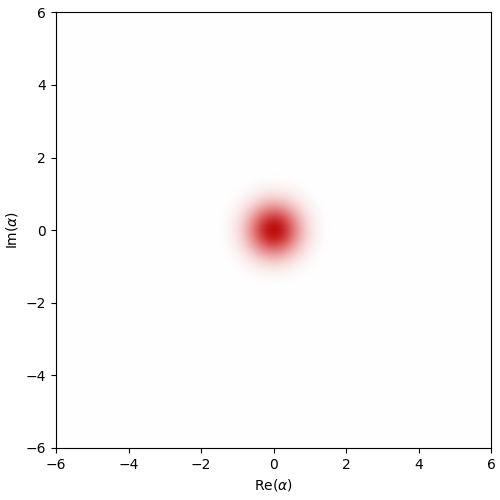

In [ ]:
# Plot Wigner function of mode a
dq.plot.wigner_gif(rho_a, gif_duration = 16, fps=60,xmax=6,ymax=6)

In [52]:
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode
eps_d=1200*MHz

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)
adag=a.dag()
bdag=b.dag()

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the Hamiltonian0

delta_omega =  (omega_b_0 - omega_d)
H = (omega_a_0 - (1/2)*(omega_p + omega_d))*(adag@a)+ delta_omega*(bdag@b) + g2*(a@a)@bdag + g2*(adag@adag)@b

# Define dissipation (buffer decay)
alpha_squared = -eps_d / g2_target  # Cat state amplitude

# Define dissipation (buffer decay)
L3 = jnp.sqrt(kappa_a) * (a @ a - alpha_squared * dq.tensor(dq.eye(na), dq.eye(nb)))

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, [L3], psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states, 0)  # Keep only mode a

print(alpha_squared)

|                                        |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

-1572.7391874180864


|███████████████████████████████████| 100.0% ◆ elapsed 12.30s ◆ remaining 0.00ms



|███████████████████████████████████| 100.0% ◆ elapsed 13.61s ◆ remaining 0.00ms

100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.95it/s]


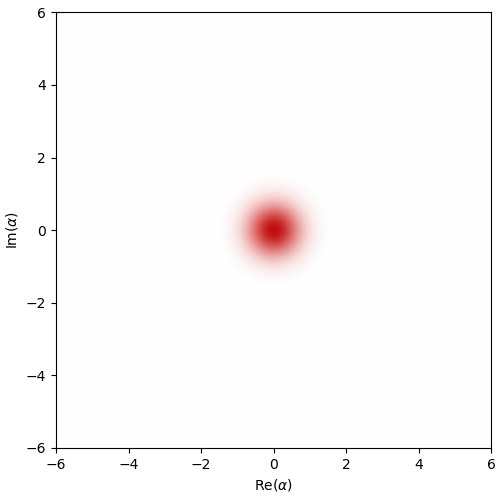

In [51]:
dq.plot.wigner_gif(rho_a, gif_duration = 16, fps=60,xmax=6,ymax=6)